

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characterstics about the patients are included in each row.

 ● 'ScheduledDay' tells us on what day the patient set up their appointment.

 ● 'Neighborhood' indicates the location of the hospital.
 
 ● 'Scholarship' indicates whether or not the patient is enrolled in Brasilian    welfare program **"Bolsa Familia"**.
>>**The encoding of the last column says 'No' if the patient showed up to their appointment, and 'Yes' if they didn't show up.**



### Question(s) for Analysis
>In this dataset we'll try to figure out which factors effect patients showing\Not showing to their scheduled medical appointments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section we'll start by loading the csv file with the data in it so we can check if there's missing data to fill or duplicate data to remove etc... 


### General Properties
> As we've noticed in the Description some of the main points(columns) to check are **'ScheduledDay' , 'Neighborhood'  , 'Scholarship'  & 'No-show'**

In [3]:
#loading the data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#How many rows (patients) & columns(records) are in the dataset
df.shape

(110527, 14)

We now know that we have 110527 Rows (patients) and 14 Columns (records)

In [5]:
#what data types are in the dataset? Are there Null Values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We now know the type of each of the columns and that there aren't any null values to be filled which means there aren't any missing data.

In [6]:
#What is the mean , min ,max?
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 ●  The mean is 37 which means that the average of patients are 37 years old.
 
 ●  The maximum is 115 which means that the highest age of a patient in this dataset is 115 years old.
 
 ●  There is an Error in the age of one patient that shows -1 years.
 


In [7]:
#Are there any Duplictes?
df.duplicated().sum()

0

There aren't any patients with the same records.

In [8]:
#Are there patients with more than one appointment?
df['PatientId'].nunique()

62299

Real Number of Patients is 62298.

In [9]:
#How many patients have more than one appointment?
df['PatientId'].duplicated().sum()

48228

48228 of the total number of patients 110527 have more than one appointment.


### Data Cleaning
> Now that we checked the dataset we'll be using cleaning methods to have a well organized dataset.
 

In [10]:
#What's the record data for the patient with the error in his\her age?
Error_Age = df.query('Age == "-1"')
Error_Age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The Index of the patient with the error in age is 99832.

In [11]:
df.to_csv('no_show_appointments_edited.csv' , index = False)

In [12]:
df_no_show = pd.read_csv('no_show_appointments_edited.csv')

We created another file so we can edit freely in it. So from no onward the wrangling process will happen in the new dataset.

In [13]:
#Removing the patient record with an error
df_no_show.drop(index = 99832 , inplace = True)

We removed the record with the error.

In [14]:
#Removing the other appointments for the patients that had more than one appointment
df_no_show.drop_duplicates(['PatientId' , 'No-show'] , inplace = True)
df_no_show.shape

(71816, 14)

Now we have a clear number of patients which is 71816 patients.

In [15]:
#As we won't be needing these columns in our dataset we'll be removing them
df_no_show.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace = True)
df_no_show.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We removed the unnecessary cloumns.

In [16]:
#Renaming cloumns
df_no_show.rename(columns = {'No-show': 'No_show'} , inplace = True)
df_no_show.rename(columns = {'Hipertension': 'Hypertension'} , inplace = True)
df_no_show.rename(columns = {'Scholarship': 'Insurance'} , inplace = True)
df_no_show.head()

,Gender,Age,Neighbourhood,Insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Renaming these columns prevents any confusion about the data.

In [17]:
#Assigning strings to be easier in the coming sections
show = df_no_show.No_show == 'No'
no_show = df_no_show.No_show == 'Yes'

Having assigned Yes & No (strings) to **No_show** column will help clearing any confusion.

In [18]:
#What are the stats of the patients that showed(came) to the hospital?
df_no_show[show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Insurance        54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64

54153 patients came to the hospital.

In [19]:
#What are the stats of the patients that didn't show(came) to the hospital?
df_no_show[no_show].count()

Gender           17663
Age              17663
Neighbourhood    17663
Insurance        17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64

17663 patients didn't came to the hospital.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. 



### General look of the whole dataset
> We'll be seeing Graph of our data

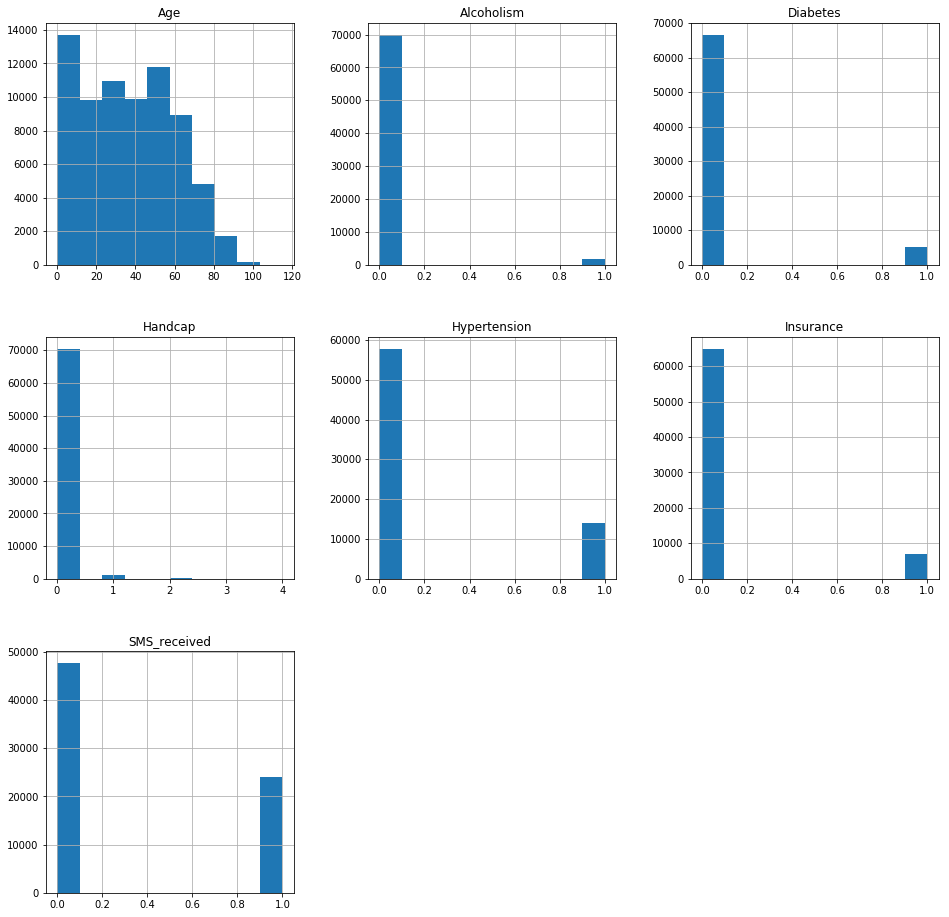

In [20]:
df_no_show.hist(figsize = (16 , 16));

### Observations

 ● The heigher the patient age the less likely they'll come to the hospital
 
 ● Most of the patients didn't have a drug problem (Aloholism).
 
 ● Most of the patients didn't have Diabetes.
 
 ● Most of the patients weren't Handcapped
 
 ● There were a few people that suffered from Hypertension.
 
 ● Most of the patients doesn't have insurance (Brasilian welfare program **"Bolsa Familia"**).

 ● Number of the patients who recieved SMS is half those who didn't.


## Comparing patients who showed & patients who didn't show according to:

## 1_Gender


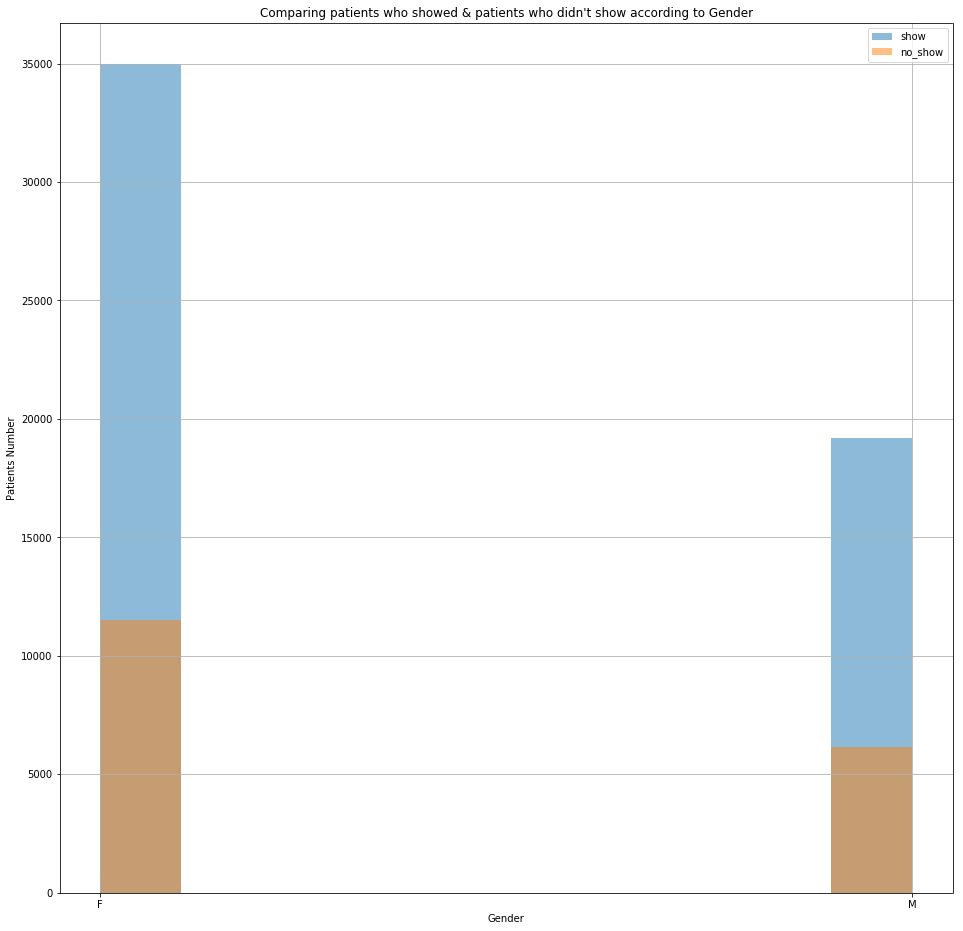

In [21]:
#Comparing those who showed and those who didn't according to Gender.
plt.figure(figsize = [16 , 16])
df_no_show.Gender[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Gender[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number');

 ● Females who showed are more than the males who showed. 
 
 ● Females who didn't show are more than the males who didn't show.
 
 ● So to show or not to show doesn't depend on **Gender**

## 2_Age

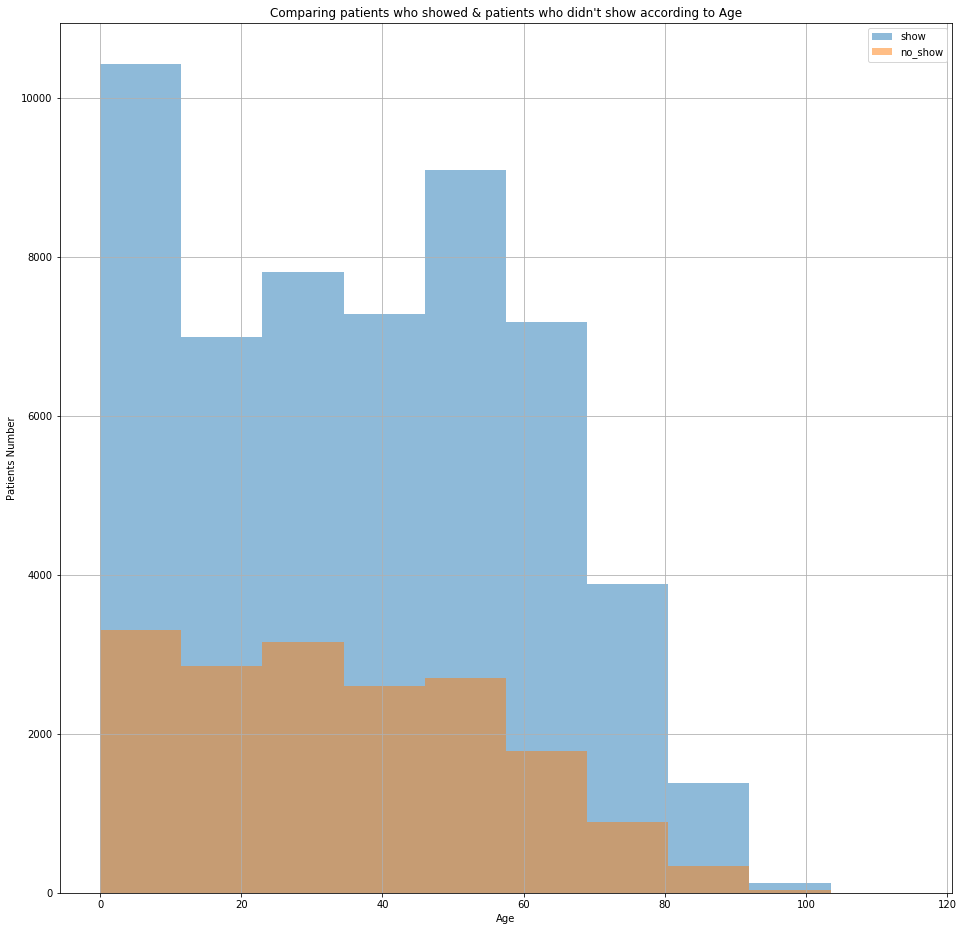

In [22]:
#Comparing those who showed and those who didn't according to Age.
plt.figure(figsize = [16 , 16])
df_no_show.Age[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Age[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Age')
plt.xlabel('Age')
plt.ylabel('Patients Number');

 ● The younger the patients are the more likely they'll go to the hospital.
 
 ● The older the patients are the less likely they'll go to the hospital.
 
 ● Age clearly have an effect on patients showing or not showing.

## 3_Neighbourhood

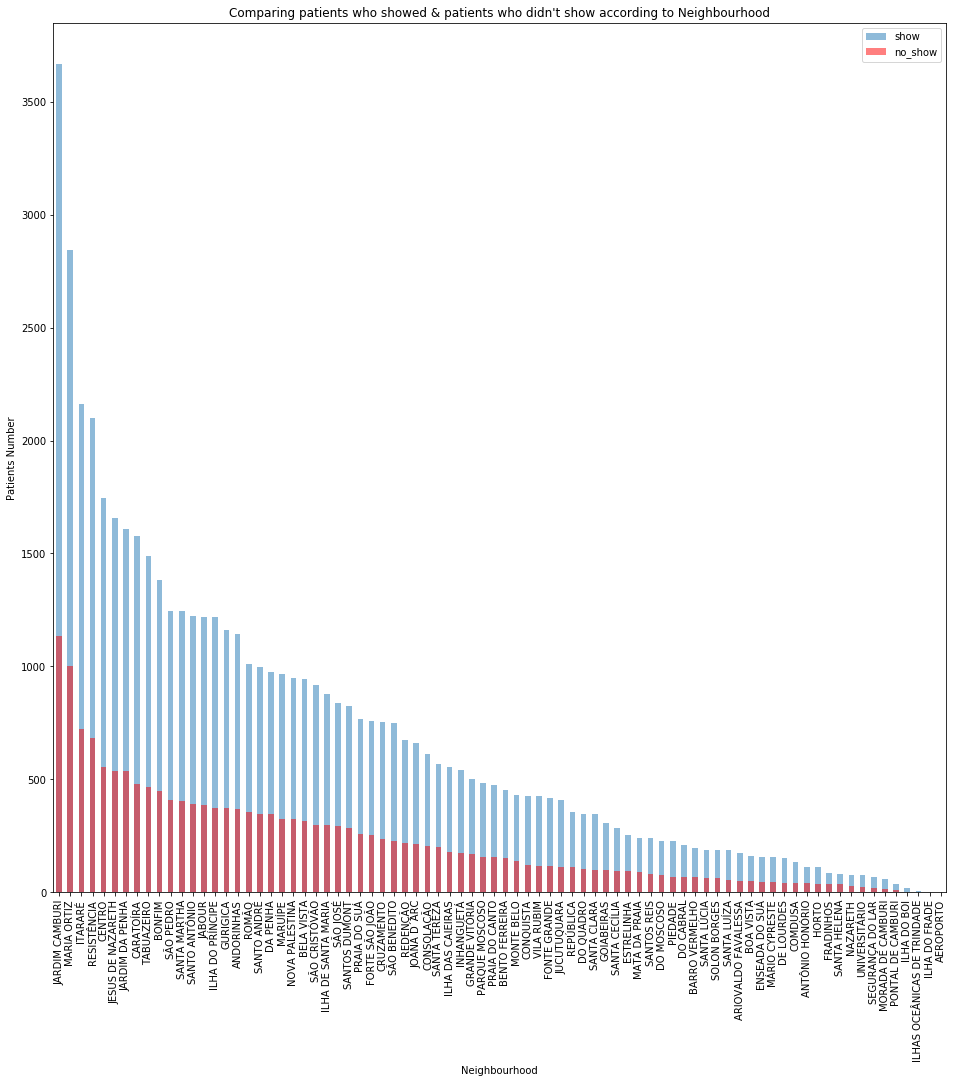

In [23]:
#Comparing those who showed and those who didn't according to Age.
plt.figure(figsize = [16 , 16])
df_no_show.Neighbourhood[show].value_counts().plot(kind='bar' , alpha = 0.5 , label = 'show')
df_no_show.Neighbourhood[no_show].value_counts().plot(kind='bar' , alpha = 0.5 , color = 'red', label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

 ● Neighbourhood clearly have an effect on patients showing or not showing.

## 4_Insurance

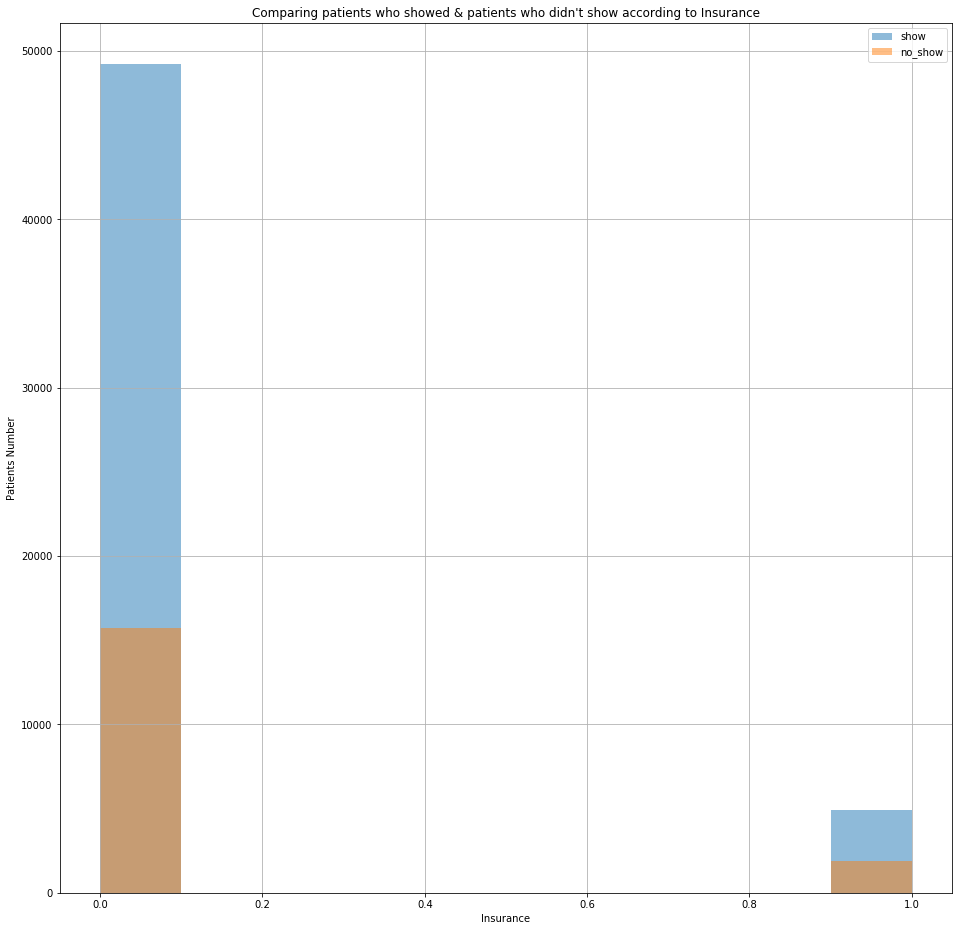

In [24]:
#Comparing those who showed and those who didn't according to Insurance.
plt.figure(figsize = [16 , 16])
df_no_show.Insurance[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Insurance[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Insurance')
plt.xlabel('Insurance')
plt.ylabel('Patients Number');

 ●   Patients who doesn't have Insurance & showed are more than those who have Insurance & showed.
 
 ●   Patients who doesn't have Insurance &  didn't show are more than those who have Insurance & didn't show. 
 
 ●   So to show / no show doesn't depend on **Insurance**

## 5_Hypertension

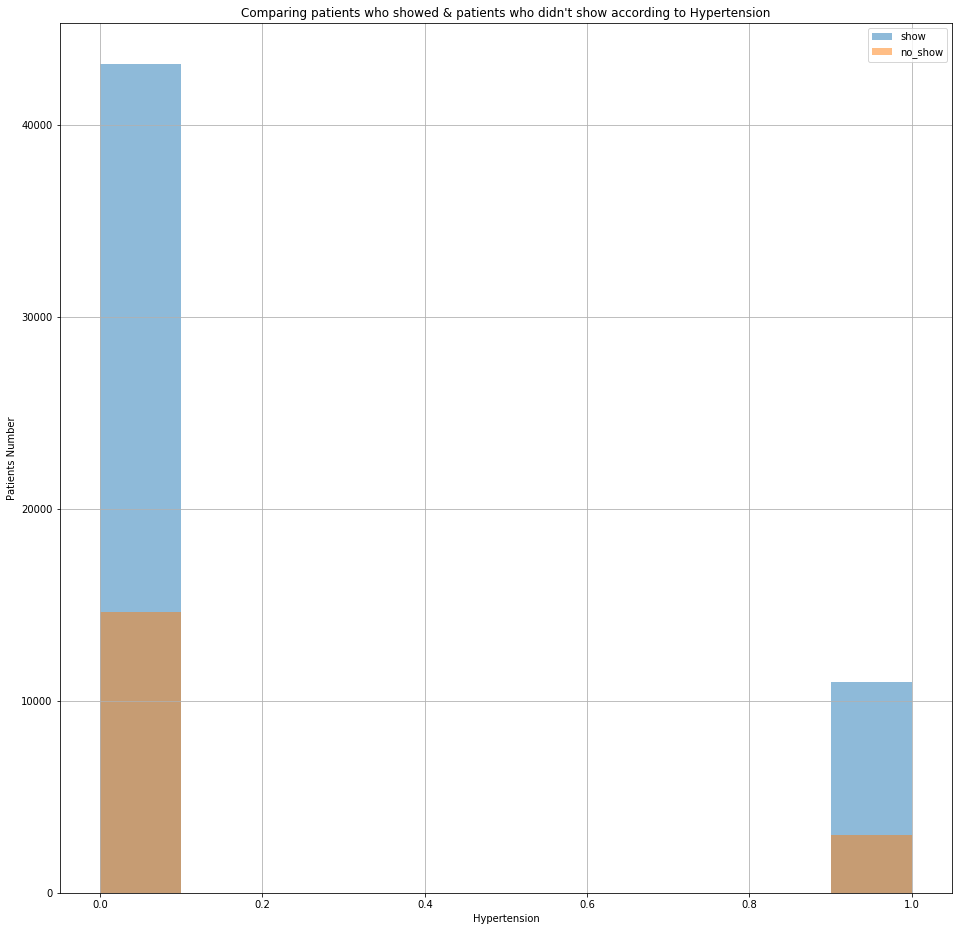

In [25]:
#Comparing those who showed and those who didn't according to Hypertension.
plt.figure(figsize = [16 , 16])
df_no_show.Hypertension[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Hypertension[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Patients Number');

 ● Patients who doesn't have Hypertension and showed are more than those who have Hypertension & showed. 
 
 ● Patients who have Hypertension and didn't show are more than those who have Hypertension & didn't show. 
 
 ● So show / no show doesn't depend on **Hypertension**

## 6_Diabetes

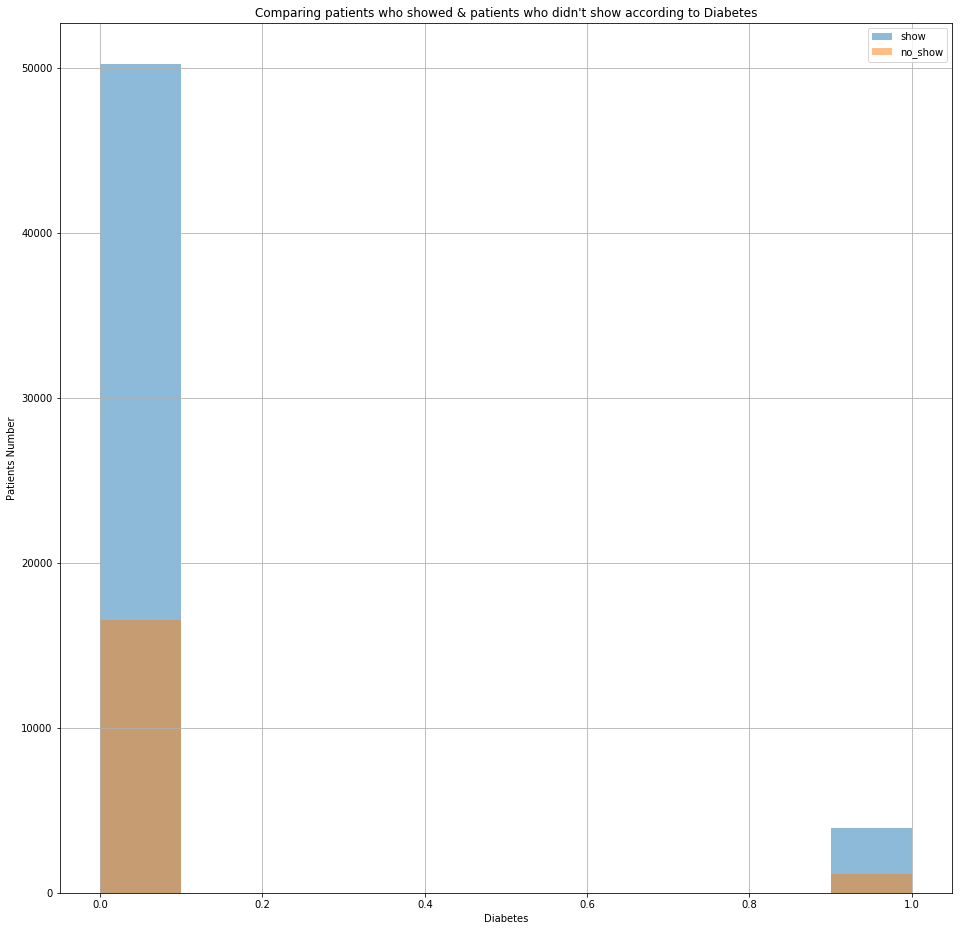

In [26]:
#Comparing those who showed and those who didn't according to Diabetes.
plt.figure(figsize = [16 , 16])
df_no_show.Diabetes[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Diabetes[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patients Number');

 ●   Patients who doesn't have Diabetes & showed are more than those who have Diabetes & showed.
 
 ●   Patients who doesn't have Diabetes & didn't show are more than those who have Diabetes & didn't show. 
 
 ●   So to show / no show doesn't depend on **Diabetes**

## 7_Alcoholism

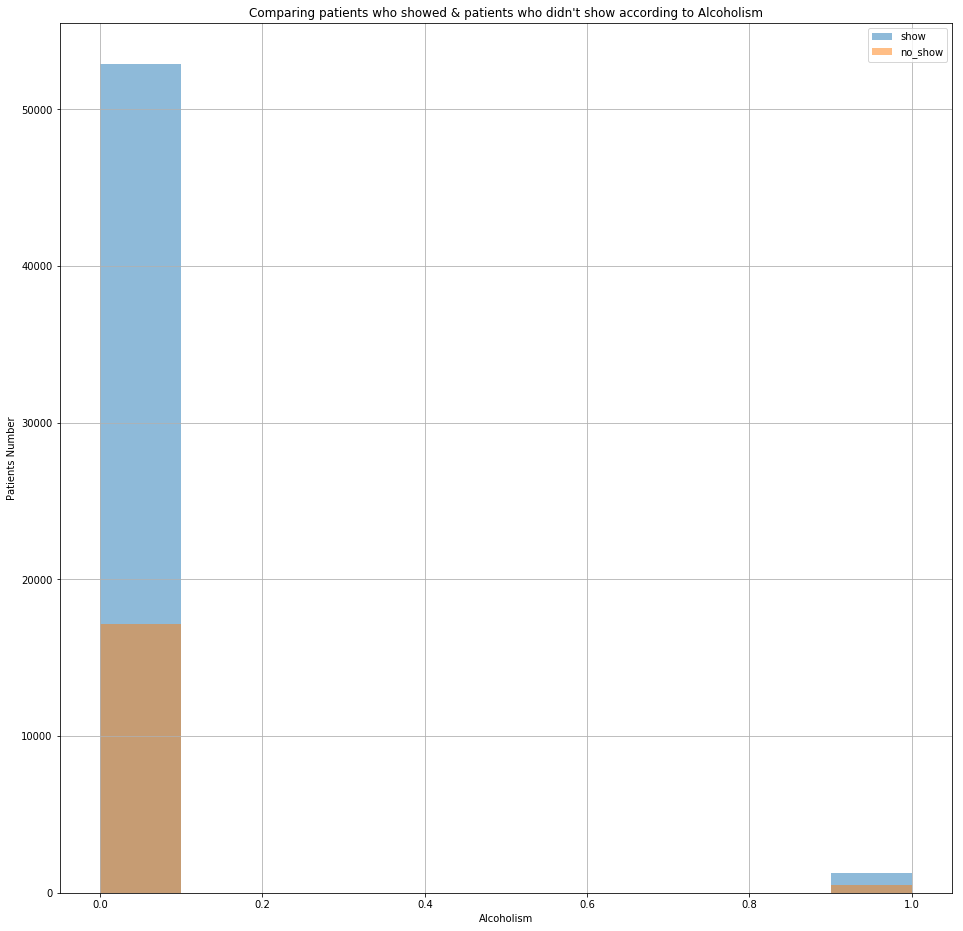

In [27]:
#Comparing those who showed and those who didn't according to Alcoholism.
plt.figure(figsize = [16 , 16])
df_no_show.Alcoholism[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Alcoholism[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Patients Number');

 ● Patients who doesn't have Alcoholism and showed are more than those who have and showed.
 
 ● Patients who doesn't have Alcoholism & didn't show are more than those who have & didn't show. 
 
 ● So to show / no show doesn't depend on **Alcoholism**

## 8_Handcap

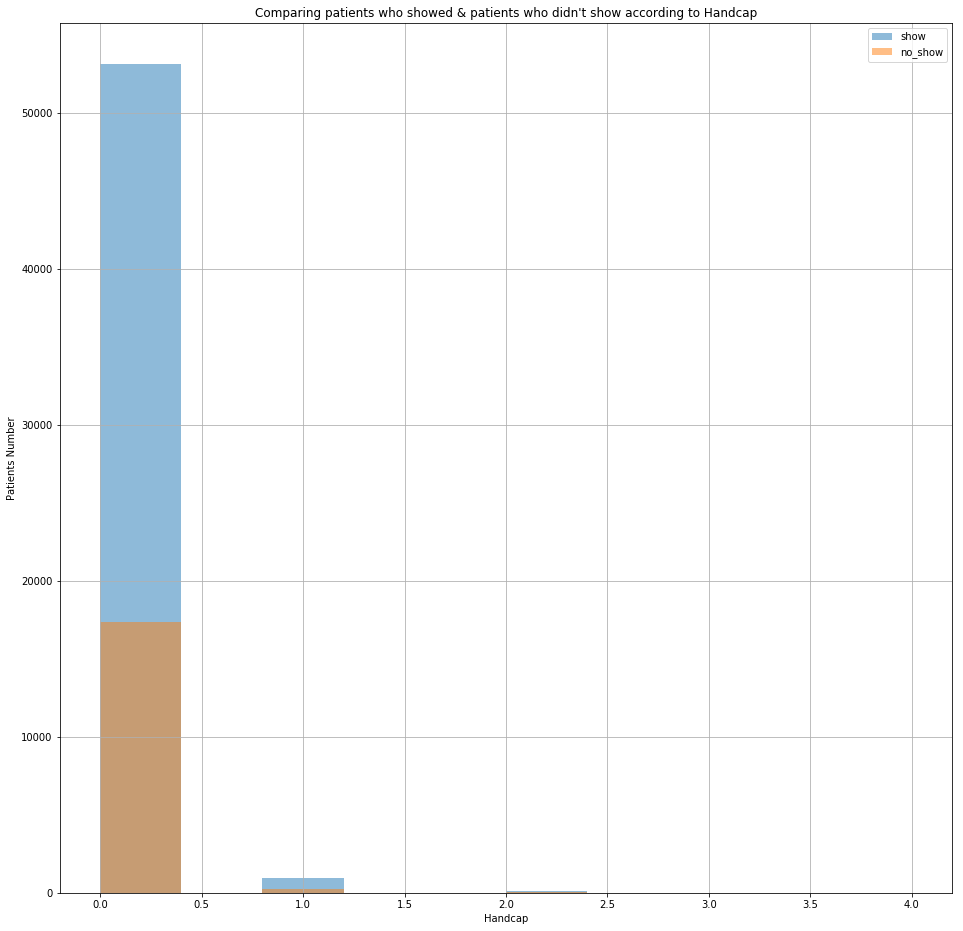

In [28]:
#Comparing those who showed and those who didn't according to Handcap.
plt.figure(figsize = [16 , 16])
df_no_show.Handcap[show].hist(alpha = 0.5 , label = 'show')
df_no_show.Handcap[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to Handcap')
plt.xlabel('Handcap')
plt.ylabel('Patients Number');

 ● Patients who aren't Handcapped and showed are more than those who are Handcapped and showed. 
 
 ● Patients who aren't Handcapped and  didn't show are more than those who are Handcapped and didn't show. 
 
 ● So to show / no show doesn't depend on **Handcap**

## 9_SMS_received

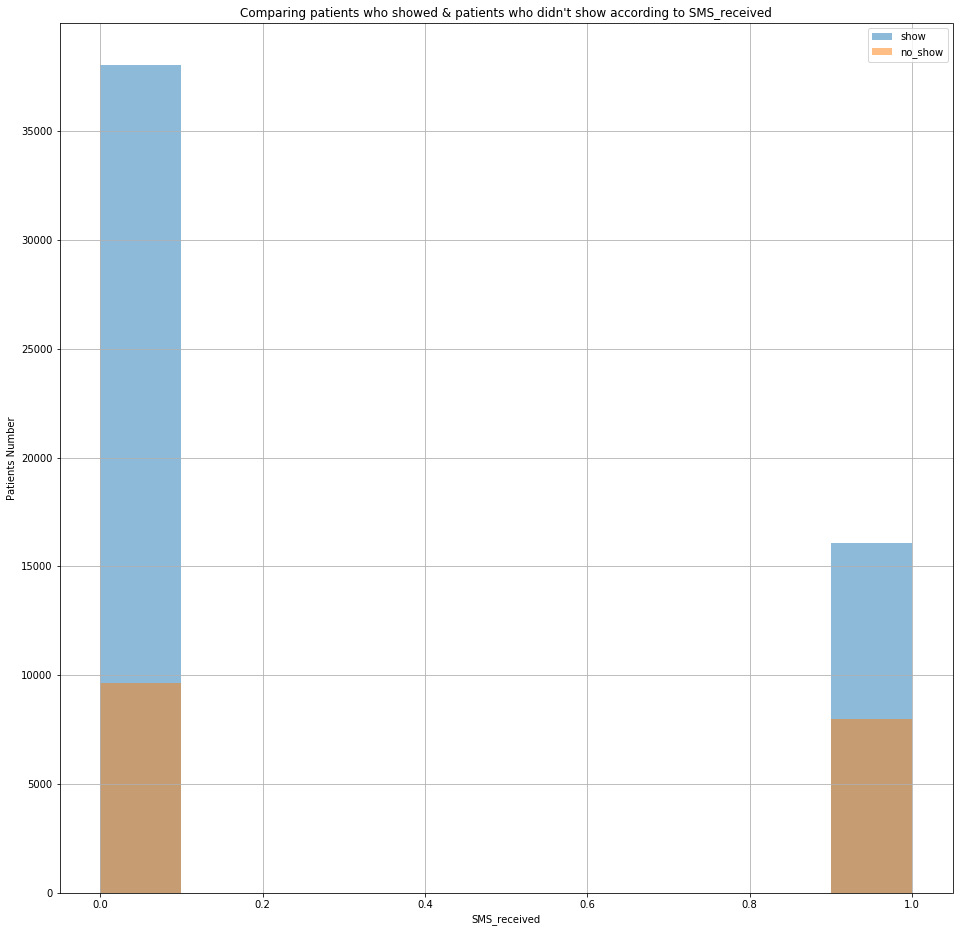

In [29]:
#Comparing those who showed and those who didn't according to SMS_received.
plt.figure(figsize = [16 , 16])
df_no_show.SMS_received[show].hist(alpha = 0.5 , label = 'show')
df_no_show.SMS_received[no_show].hist(alpha = 0.5 , label = 'no_show')
plt.legend()
plt.title('Comparing patients who showed & patients who didn\'t show according to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Patients Number');

Weirdly alot of people showed up withour recieving SMS

<a id='conclusions'></a>
## Conclusions

To sum up what we've discovered during analysing this dataset 

1_Neighbourhood clearly have an effect on patients showing or not showing.

2_Age clearly have an effect on patients showing or not showing.

3_SMS_received clearly have a negative effect on patients showing or not showing.
>>No corrolation was found between showing/not showing and (Gender , Insurance , Hypertension , Diabetes , Alcoholism & Handcap)
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0